<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#LyricsManager.py" data-toc-modified-id="LyricsManager.py-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LyricsManager.py</a></span></li><li><span><a href="#MoodyLyrics-issue" data-toc-modified-id="MoodyLyrics-issue-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>MoodyLyrics issue</a></span></li><li><span><a href="#New-features" data-toc-modified-id="New-features-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>New features</a></span><ul class="toc-item"><li><span><a href="#Dataset-Stats" data-toc-modified-id="Dataset-Stats-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Dataset Stats</a></span></li><li><span><a href="#Artificial-Neural-Network" data-toc-modified-id="Artificial-Neural-Network-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Artificial Neural Network</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>SVM</a></span></li><li><span><a href="#Gradient-Boost" data-toc-modified-id="Gradient-Boost-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Gradient Boost</a></span></li></ul></li></ul></div>

In [1]:
import spacy
import os
import sys

import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

from utils.datasets import load_dataset_from_path, split_train_validation


# Introduction
**Previously on Sara&Mario project**: 
<ol>
    <li>*MoodyLyrics* stats analysis</li>
    <li>Lyrics classification using the main classifiers</li>
    <li>Emotion classification by just considering the song title</li> 
</ol>
Now, following the last meeting discussion we: 
<ol>
    <li>Wrote a script to create the dataset *SpotifyURI*, *List of PlaylistIDs*, *MoodyLyric_Emotion*</li>
    <li>Wrote a script to detect all duplicated songs in MoodyLyrics to fill a bug report</li>
    <li>Added new features for the classification task</li>
</ol>

# LyricsManager.py
After downloading the Spotify RecSys Challenge dataset we wrote a script that: <br>
<ul>
    <li>Given as input: the *Spotify playlist dataset folder*, and an output folder, creates a data structure to store for each song:<br>
        <*SpotifyURI*, *PlaylistIDs*, *TrackInformation*, *Emotion*><br>
        where: 
            <ul>
                <li>*SpotifyURI* is the songID</li>
                <li>*PlaylistsIDs* is the list of playlist in which the song appear</li>
                <li>*TrackInformation* is the list of information taken from Spotify dataset</li>
                <li>*Emotion* is an optional field, present only if the song is also contained in the MoodyLyrics dataset, that contains the emotion label for the song
    </li>
            </ul>
      <li>Can load Spotify songs datastructure (if already existing)</li>
            <li>Given as input a SpotifyURI it can download lyrics from lyricwikia</li>
</ul>

# MoodyLyrics issue
New week we detected duplicate information in MoodyLyrics. Now we can generate a .csv file capable of reporting those duplicates.

Now it's time to fill a bug.

# New features
Starting from MoodyLyrics we are going to create a new dataset with a lot of new features. <br>
<ul>
    <li>**Title_vector**</li>
    <li>**Lyric_vector**</li>
    <li>**%Rhymes**:<br> defined as the percentage of the number of rhymes over the number of total lines. A rhyme is defined as a rhyme between two following lines.</li>
    <li>**%Past_tense_verbs**:<br> defined as the the percentage of the number of past tense verbs over the total number of verbs.</li>
    <li>**%Present_tense_verbs**:<br>  defined as the the percentage of the number of present tense verbs over the total number of verbs.</li>
    <li>**%Future_tense_verbs**:<br>  defined as the the percentage of the number of future tense verbs over the total number of verbs, where future is just will + base form.</li>
    <li>**%ADJ**:<br> Percentage of adjectives over the total number of words.</li>
    <li>**%ADP**:<br> Percentage of adpositions (e.g. in, to, during) over the total number of words.</li>
    <li>**%ADV**:<br> Percentage of adverbs (e.g. very, tomorrow, down, where, there) over the total number of words.</li>
    <li>**%AUX**:<br> Percentage of auxiliaries (e.g. is, has (done), will (do), should (do)) over the total number of words.</li>
    <li>**%INTJ**:<br> Percentage of interjections (e.g. psst, ouch, bravo, hello) over the total number of words.</li>
    <li>**%NOUN**:<br> Percentage of nouns over the total number of words.</li>
    <li>**%NUM**:<br> Percentage of numerals over the total number of words.</li>
    <li>**%PRON**:<br> Percentage of pronouns (e.g. I, you, he, she, myself, themselves, somebody,...) over the total number of words.</li> 
    <li>**%PROPN**:<br> Percentage of proper nouns (e.g. Mary, John) over the total number of words.</li>
    <li>**%PUNCT**:<br> Percentage of puntuctuation (e.g. ., (, ), ?) over the total number of words.</li>
    <li>**%VERB**:<br> Percentage of verbs over the total number of words.</li>
    <li>**Selfish_degree**:<br> Percentage of 'I' pronouns over the total number of pronouns</li>
    <li>**%Echoism**:<br> Percentage of echoism over the total number of words, where an echoism is either a sequence of two subsequent repeated words or the repetition of a vowel in a word. </li>
    <li>**%Duplicates**:<br> Percentage of duplicate words over the total number of words</li>
    <li>**isTitleInLyric**:<br> Boolean, true if the title string is also a substring of the lyric</li>
</ul>


## Dataset Stats

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('./datasets/emotion_detection_dataset.csv')
dataset.columns = ['ID', 'ARTIST', 'SONG_TITLE', 'LYRICS_VECTOR', 'TITLE_VECTOR', 
                   'LINE_COUNT', 'WORD_COUNT', 'ECHOISMS', 'SELFISH_DEGREE', 
                   'DUPLICATE_LINES', 'IS_TITLE_IN_LYRICS', 'RHYMES', 'VERB_PRESENT', 
                   'VERB_PAST', 'VERB_FUTURE', 'ADJ_FREQUENCIES', 'CONJUCTION_FREQUENCIES', 
                   'ADV_FREQUENCIES', 'AUX_FREQUENCIES', 'CONJ_FREQUENCIES', 'CCONJ_FREQUENCIES', 
                   'DETERMINER_FREQUENCIES', 'INTERJECTION_FREQUENCIES', 'NOUN_FREQUENCIES', 
                   'NUM_FREQUENCIES', 'PART_FREQUENCIES', 'PRON_FREQUENCIES', 'PROPN_FREQUENCIES', 
                   'PUNCT_FREQUENCIES', 'SCONJ_FREQUENCIES', 'SYM_FREQUENCIES', 'VERB_FREQUENCIES', 
                   'X_FREQUENCIES', 'SPACE_FREQUENCIES', 'EMOTION']

In [4]:
useless_columns = [ 'ID','ARTIST', 'SONG_TITLE', 'EMOTION', 'X_FREQUENCIES', 'SPACE_FREQUENCIES']

In [5]:
print(len(dataset.columns))

35


In [6]:
dataset.head(1)

,ID,ARTIST,SONG_TITLE,LYRICS_VECTOR,TITLE_VECTOR,LINE_COUNT,WORD_COUNT,ECHOISMS,SELFISH_DEGREE,DUPLICATE_LINES,...,PART_FREQUENCIES,PRON_FREQUENCIES,PROPN_FREQUENCIES,PUNCT_FREQUENCIES,SCONJ_FREQUENCIES,SYM_FREQUENCIES,VERB_FREQUENCIES,X_FREQUENCIES,SPACE_FREQUENCIES,EMOTION
0,0,.38 Special,Fantasy Girl,[-2.59583928e-02 1.46213636e-01 -2.40031540e-...,[-0.1325517 0.07027499 -0.353215 0.047058...,36,174,0.0,0.291667,0.091954,...,0.00121,0.00363,0.0,0.001361,0.0,0.0,0.006352,0.0,0.0,relaxed


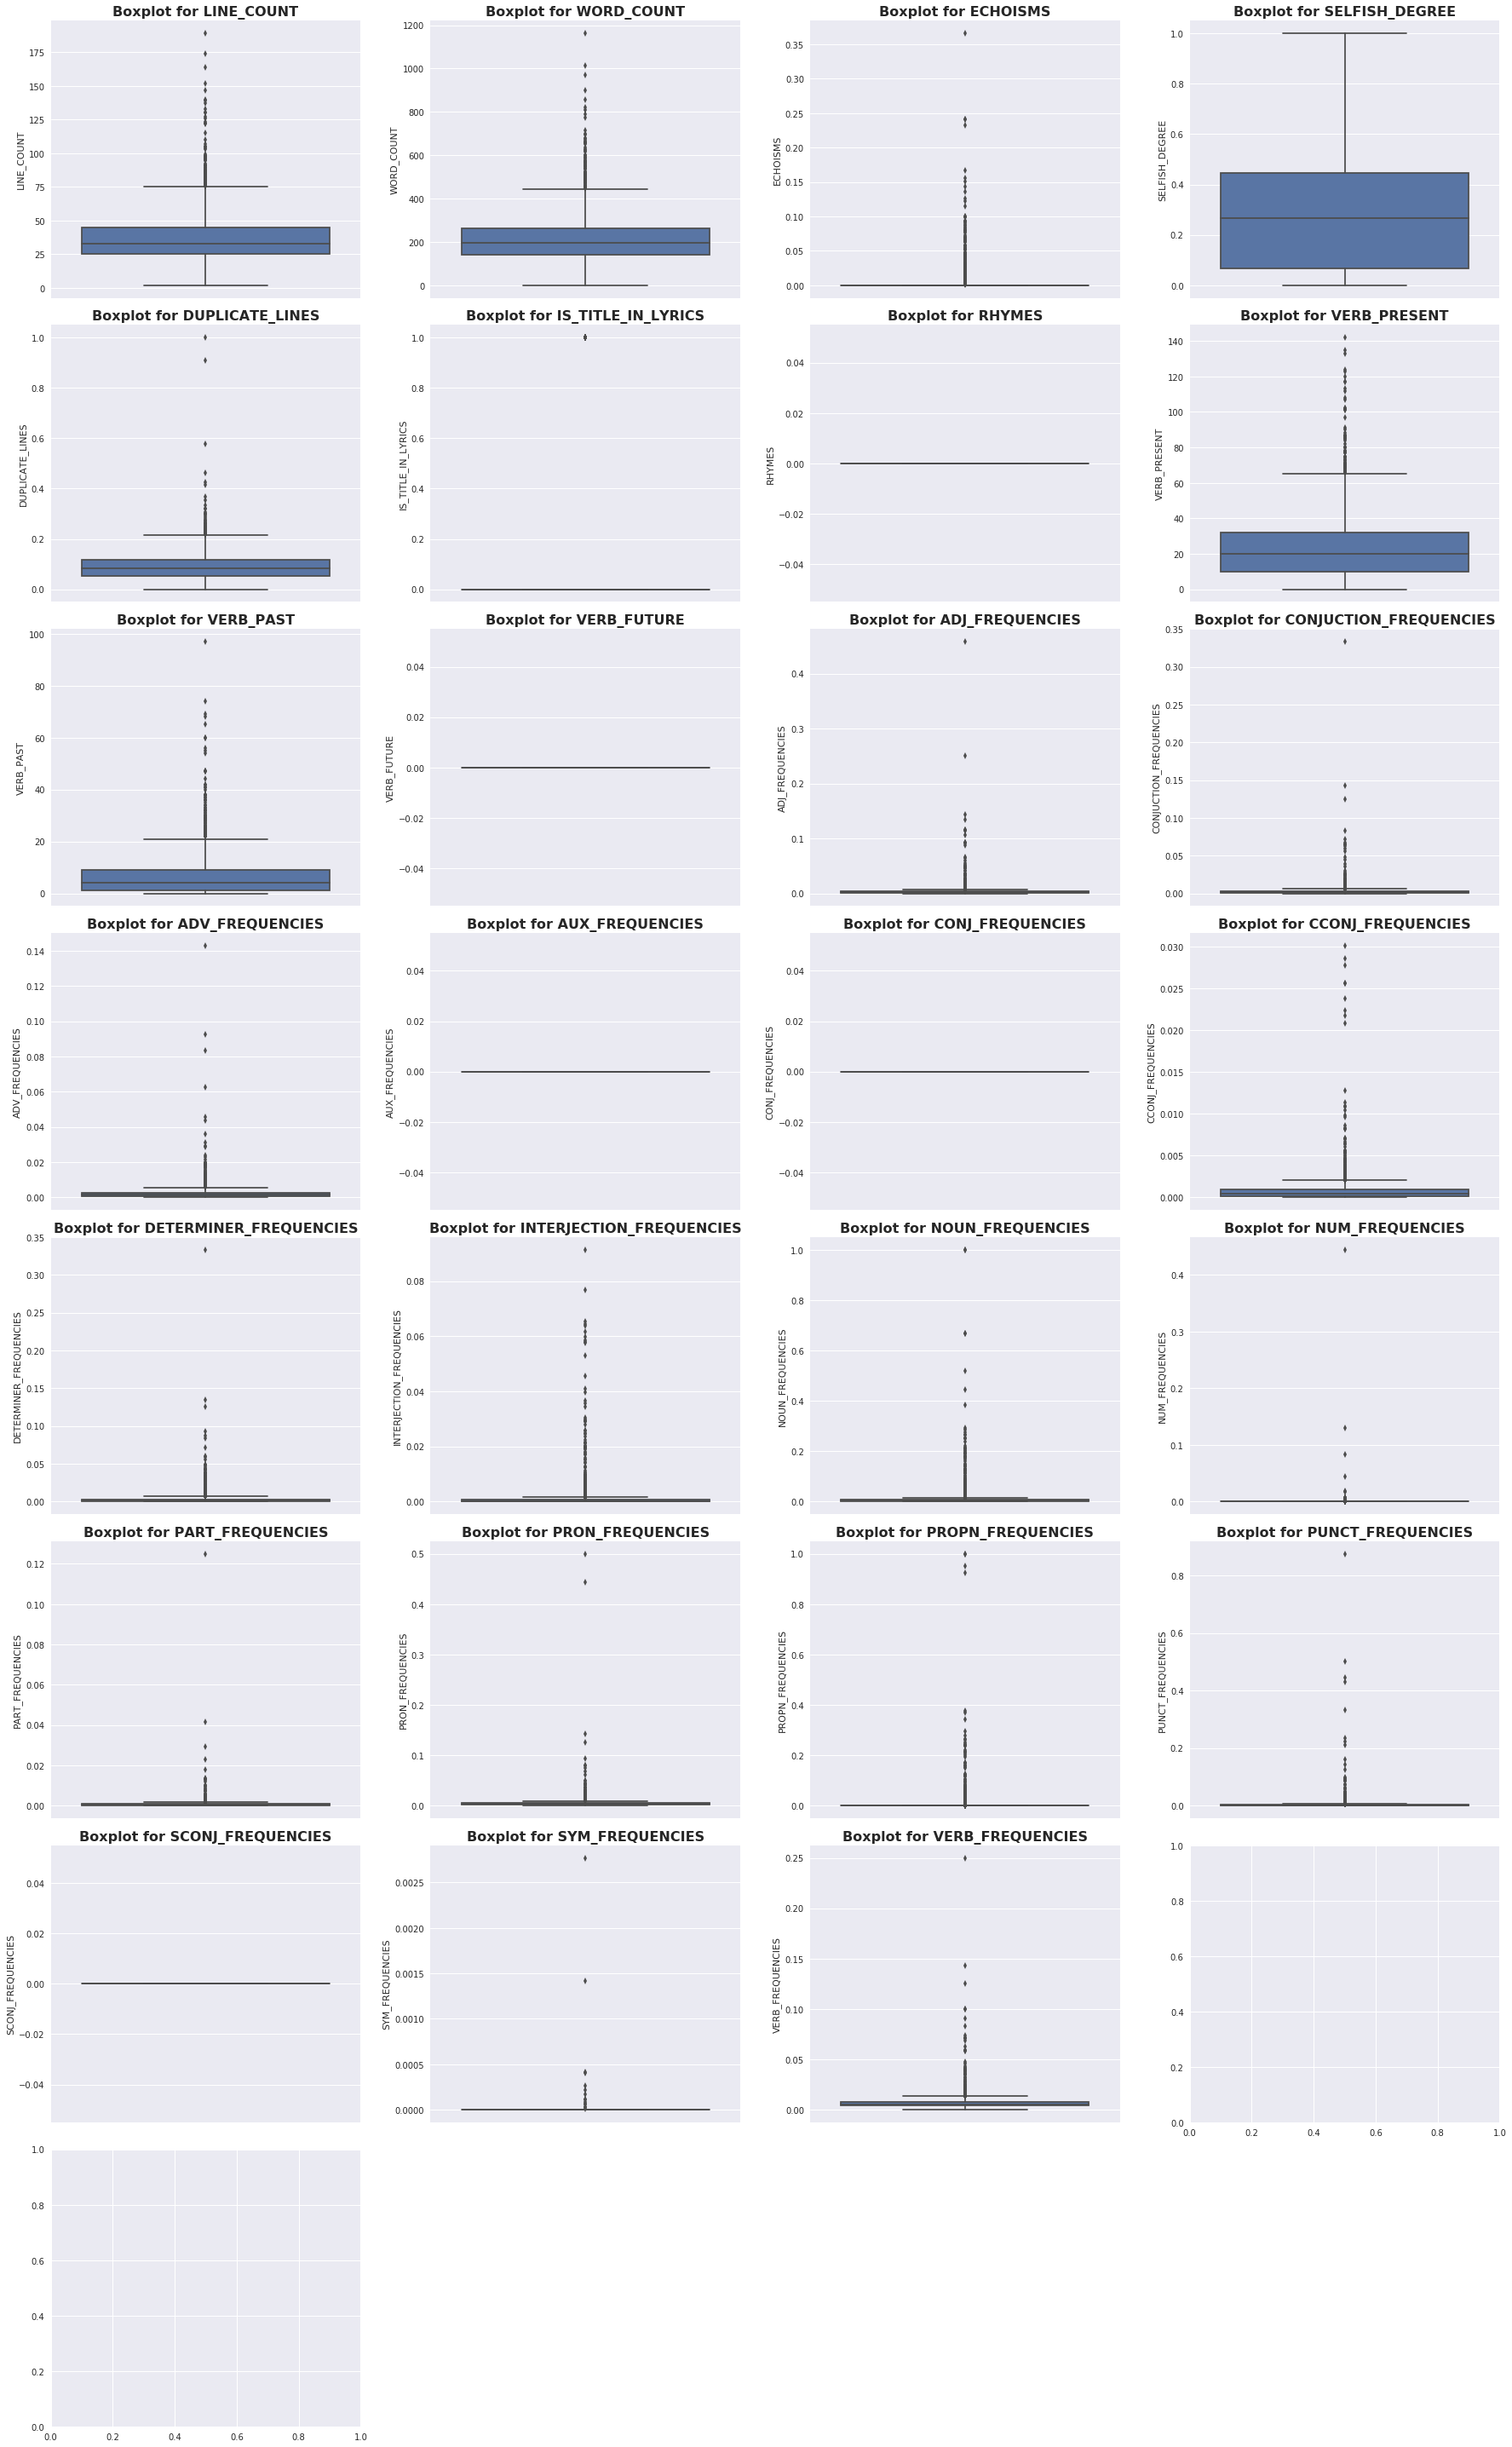

In [36]:
tmp_df = dataset.drop(useless_columns + ['LYRICS_VECTOR', 'TITLE_VECTOR'],axis=1)

f, axarr = plt.subplots(8, 4, figsize=(25,40))
k = 0
for feature in tmp_df.columns:
    (i, j) = divmod(k, 4)
    axarr[i,j] = sns.boxplot(y=tmp_df[feature], ax=axarr[i,j])
    axarr[i,j].set_title('Boxplot for {}'.format(feature), fontsize=16, weight='bold')
    k += 1
plt.tight_layout()
f.delaxes(axarr[-1,-1])
f.delaxes(axarr[-1,-2])
f.delaxes(axarr[-1,-3])

## Artificial Neural Network

In [7]:
tmp_df = dataset.drop(useless_columns, axis=1)
X_vect = list()
for (i, row) in tmp_df.iterrows():
    sub_list = list()
    for field in row:
        if type(field) == str:
            field = field[1:-1].split()
            sub_list += [float(x.replace('\n','')) for x in field]
        else:
            sub_list.append(field)
    X_vect.append(np.array(sub_list))
X_vect = np.array(X_vect)

y = dataset['EMOTION'].as_matrix().T

In [8]:
print(X_vect.shape)
print(y.shape)

(2452, 627)
(2452,)


In [9]:
#1 Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size = 0.2, random_state = 0)

#2 y_nn should be a vector (len(X_vect),4), with a 1 in the right class
from keras.utils import np_utils
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y = encoder.transform(y_train)
y_nn = np_utils.to_categorical(encoded_Y)

#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# we need to scale because we don't want one feature to predomine the others
# Standardize features by removing the mean and scaling to unit variance
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Using TensorFlow backend.


In [19]:
#1 Importing the Keras libraries and packages
import keras
# Sequential module is required to initialize our ANN
from keras.models import Sequential
# Dense module is required to create the layers
from keras.layers import Dense, Dropout
    
def build_ann(optimizer='adam', input_size=X_vect.shape[1]):
    classifier = Sequential()
    #2 Adding first hidden layer
    classifier.add(Dense(units = 60, kernel_initializer = 'random_normal', activation = 'sigmoid', input_dim = input_size))
    classifier.add(Dropout(0.5))

    # Adding second hidden layer
    classifier.add(Dense(units = 60, kernel_initializer = 'random_normal', activation = 'sigmoid'))
    classifier.add(Dropout(0.5))

    # Adding output layer
    classifier.add(Dense(units = 4, kernel_initializer = 'random_normal', activation = 'softmax'))

    #3 Compiling the ANN
    classifier.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return classifier

In [20]:
from keras.wrappers.scikit_learn import KerasClassifier

keras_classifier = KerasClassifier(build_fn=build_ann)
parameters = {'batch_size': [256],
              'epochs': [100],
              'optimizer': ['adam']}
grid_search = GridSearchCV(estimator = keras_classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           verbose=0)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_
best_classifier = grid_search.best_estimator_
print('Accuracy: %0.2f' % (best_accuracy*100))

Epoch 1/100
1764/1764 [==============================] - 3s 2ms/step - loss: 1.3960 - acc: 0.2449
Epoch 2/100
1764/1764 [==============================] - 0s 82us/step - loss: 1.3875 - acc: 0.2636
Epoch 3/100
1764/1764 [==============================] - 0s 67us/step - loss: 1.3852 - acc: 0.2965
Epoch 4/100
1764/1764 [==============================] - 0s 62us/step - loss: 1.3802 - acc: 0.2971
Epoch 5/100
1764/1764 [==============================] - 0s 61us/step - loss: 1.3855 - acc: 0.2976
Epoch 6/100
1764/1764 [==============================] - 0s 67us/step - loss: 1.3817 - acc: 0.2988
Epoch 7/100
1764/1764 [==============================] - 0s 70us/step - loss: 1.3755 - acc: 0.3078
Epoch 8/100
1764/1764 [==============================] - 0s 66us/step - loss: 1.3728 - acc: 0.3090
Epoch 9/100
1764/1764 [==============================] - 0s 66us/step - loss: 1.3668 - acc: 0.3169
Epoch 10/100
1764/1764 [==============================] - 0s 64us/step - loss: 1.3519 - acc: 0.3362
Epoch 11/1

1764/1764 [==============================] - 0s 70us/step - loss: 0.8336 - acc: 0.5329
Epoch 84/100
1764/1764 [==============================] - 0s 66us/step - loss: 0.8340 - acc: 0.5374
Epoch 85/100
1764/1764 [==============================] - 0s 69us/step - loss: 0.8318 - acc: 0.5476
Epoch 86/100
1764/1764 [==============================] - 0s 68us/step - loss: 0.8290 - acc: 0.5340
Epoch 87/100
1764/1764 [==============================] - 0s 69us/step - loss: 0.8361 - acc: 0.5249
Epoch 88/100
1764/1764 [==============================] - 0s 73us/step - loss: 0.8317 - acc: 0.5147
Epoch 89/100
1764/1764 [==============================] - 0s 66us/step - loss: 0.8348 - acc: 0.5357
Epoch 90/100
1764/1764 [==============================] - 0s 65us/step - loss: 0.8283 - acc: 0.5414
Epoch 91/100
1764/1764 [==============================] - 0s 66us/step - loss: 0.8356 - acc: 0.5397
Epoch 92/100
1764/1764 [==============================] - 0s 66us/step - loss: 0.8379 - acc: 0.5425
Epoch 93/100


1765/1765 [==============================] - 0s 67us/step - loss: 0.8153 - acc: 0.5660
Epoch 66/100
1765/1765 [==============================] - 0s 64us/step - loss: 0.8176 - acc: 0.5558
Epoch 67/100
1765/1765 [==============================] - 0s 65us/step - loss: 0.8183 - acc: 0.5711
Epoch 68/100
1765/1765 [==============================] - 0s 63us/step - loss: 0.8135 - acc: 0.5694
Epoch 69/100
1765/1765 [==============================] - 0s 64us/step - loss: 0.8155 - acc: 0.5620
Epoch 70/100
1765/1765 [==============================] - 0s 63us/step - loss: 0.8139 - acc: 0.5790
Epoch 71/100
1765/1765 [==============================] - 0s 64us/step - loss: 0.8167 - acc: 0.5717
Epoch 72/100
1765/1765 [==============================] - 0s 64us/step - loss: 0.8163 - acc: 0.5909
Epoch 73/100
1765/1765 [==============================] - 0s 63us/step - loss: 0.8065 - acc: 0.5870
Epoch 74/100
1765/1765 [==============================] - 0s 67us/step - loss: 0.8031 - acc: 0.6068
Epoch 75/100


1765/1765 [==============================] - 0s 71us/step - loss: 0.8356 - acc: 0.5473
Epoch 48/100
1765/1765 [==============================] - 0s 65us/step - loss: 0.8344 - acc: 0.5456
Epoch 49/100
1765/1765 [==============================] - 0s 64us/step - loss: 0.8357 - acc: 0.5484
Epoch 50/100
1765/1765 [==============================] - 0s 67us/step - loss: 0.8330 - acc: 0.5314
Epoch 51/100
1765/1765 [==============================] - 0s 65us/step - loss: 0.8307 - acc: 0.5422
Epoch 52/100
1765/1765 [==============================] - 0s 65us/step - loss: 0.8316 - acc: 0.5348
Epoch 53/100
1765/1765 [==============================] - 0s 67us/step - loss: 0.8350 - acc: 0.5439
Epoch 54/100
1765/1765 [==============================] - 0s 65us/step - loss: 0.8369 - acc: 0.5422
Epoch 55/100
1765/1765 [==============================] - 0s 66us/step - loss: 0.8297 - acc: 0.5484
Epoch 56/100
1765/1765 [==============================] - 0s 67us/step - loss: 0.8290 - acc: 0.5405
Epoch 57/100


1765/1765 [==============================] - 0s 70us/step - loss: 0.8820 - acc: 0.5592
Epoch 30/100
1765/1765 [==============================] - 0s 62us/step - loss: 0.8859 - acc: 0.5456
Epoch 31/100
1765/1765 [==============================] - 0s 61us/step - loss: 0.8698 - acc: 0.5439
Epoch 32/100
1765/1765 [==============================] - 0s 60us/step - loss: 0.8688 - acc: 0.5428
Epoch 33/100
1765/1765 [==============================] - 0s 61us/step - loss: 0.8718 - acc: 0.5535
Epoch 34/100
1765/1765 [==============================] - 0s 63us/step - loss: 0.8630 - acc: 0.5354
Epoch 35/100
1765/1765 [==============================] - 0s 65us/step - loss: 0.8582 - acc: 0.5439
Epoch 36/100
1765/1765 [==============================] - 0s 62us/step - loss: 0.8568 - acc: 0.5399
Epoch 37/100
1765/1765 [==============================] - 0s 61us/step - loss: 0.8534 - acc: 0.5388
Epoch 38/100
1765/1765 [==============================] - 0s 61us/step - loss: 0.8509 - acc: 0.5547
Epoch 39/100


1765/1765 [==============================] - 0s 70us/step - loss: 1.2869 - acc: 0.4652
Epoch 12/100
1765/1765 [==============================] - 0s 65us/step - loss: 1.2361 - acc: 0.4969
Epoch 13/100
1765/1765 [==============================] - 0s 62us/step - loss: 1.1803 - acc: 0.5003
Epoch 14/100
1765/1765 [==============================] - 0s 63us/step - loss: 1.1261 - acc: 0.5224
Epoch 15/100
1765/1765 [==============================] - 0s 63us/step - loss: 1.0686 - acc: 0.5161
Epoch 16/100
1765/1765 [==============================] - 0s 64us/step - loss: 1.0147 - acc: 0.5280
Epoch 17/100
1765/1765 [==============================] - 0s 64us/step - loss: 0.9801 - acc: 0.5258
Epoch 18/100
1765/1765 [==============================] - 0s 61us/step - loss: 0.9379 - acc: 0.5422
Epoch 19/100
1765/1765 [==============================] - 0s 64us/step - loss: 0.9116 - acc: 0.5326
Epoch 20/100
1765/1765 [==============================] - 0s 67us/step - loss: 0.8947 - acc: 0.5320
Epoch 21/100


1765/1765 [==============================] - 0s 72us/step - loss: 0.7237 - acc: 0.5297
Epoch 94/100
1765/1765 [==============================] - 0s 67us/step - loss: 0.7238 - acc: 0.5490
Epoch 95/100
1765/1765 [==============================] - 0s 69us/step - loss: 0.7328 - acc: 0.5360
Epoch 96/100
1765/1765 [==============================] - 0s 75us/step - loss: 0.7229 - acc: 0.5428
Epoch 97/100
1765/1765 [==============================] - 0s 77us/step - loss: 0.7316 - acc: 0.5422
Epoch 98/100
1765/1765 [==============================] - 0s 70us/step - loss: 0.7241 - acc: 0.5320
Epoch 99/100
1765/1765 [==============================] - 0s 67us/step - loss: 0.7289 - acc: 0.5303
Epoch 100/100
1765/1765 [==============================] - 0s 66us/step - loss: 0.7317 - acc: 0.5280
Epoch 1/100
1765/1765 [==============================] - 3s 2ms/step - loss: 1.3935 - acc: 0.2776
Epoch 2/100
1765/1765 [==============================] - 0s 69us/step - loss: 1.3853 - acc: 0.2895
Epoch 3/100
176

1765/1765 [==============================] - 0s 74us/step - loss: 0.7417 - acc: 0.5360
Epoch 76/100
1765/1765 [==============================] - 0s 69us/step - loss: 0.7402 - acc: 0.5337
Epoch 77/100
1765/1765 [==============================] - 0s 66us/step - loss: 0.7439 - acc: 0.5365
Epoch 78/100
1765/1765 [==============================] - 0s 65us/step - loss: 0.7376 - acc: 0.5303
Epoch 79/100
1765/1765 [==============================] - 0s 66us/step - loss: 0.7447 - acc: 0.5331
Epoch 80/100
1765/1765 [==============================] - 0s 68us/step - loss: 0.7405 - acc: 0.5365
Epoch 81/100
1765/1765 [==============================] - 0s 67us/step - loss: 0.7382 - acc: 0.5394
Epoch 82/100
1765/1765 [==============================] - 0s 67us/step - loss: 0.7407 - acc: 0.5269
Epoch 83/100
1765/1765 [==============================] - 0s 69us/step - loss: 0.7411 - acc: 0.5343
Epoch 84/100
1765/1765 [==============================] - 0s 69us/step - loss: 0.7386 - acc: 0.5224
Epoch 85/100


1765/1765 [==============================] - 0s 72us/step - loss: 0.5031 - acc: 0.7530
Epoch 58/100
1765/1765 [==============================] - 0s 68us/step - loss: 0.5044 - acc: 0.7530
Epoch 59/100
1765/1765 [==============================] - 0s 66us/step - loss: 0.5066 - acc: 0.7496
Epoch 60/100
1765/1765 [==============================] - 0s 66us/step - loss: 0.5094 - acc: 0.7456
Epoch 61/100
1765/1765 [==============================] - 0s 67us/step - loss: 0.4840 - acc: 0.7490
Epoch 62/100
1765/1765 [==============================] - 0s 69us/step - loss: 0.4932 - acc: 0.7360
Epoch 63/100
1765/1765 [==============================] - 0s 68us/step - loss: 0.4902 - acc: 0.7558
Epoch 64/100
1765/1765 [==============================] - 0s 68us/step - loss: 0.4804 - acc: 0.7518
Epoch 65/100
1765/1765 [==============================] - 0s 68us/step - loss: 0.4850 - acc: 0.7462
Epoch 66/100
1765/1765 [==============================] - 0s 70us/step - loss: 0.4755 - acc: 0.7717
Epoch 67/100


1765/1765 [==============================] - 0s 67us/step - loss: 0.7772 - acc: 0.5167
Epoch 40/100
1765/1765 [==============================] - 0s 62us/step - loss: 0.7770 - acc: 0.5178
Epoch 41/100
1765/1765 [==============================] - 0s 63us/step - loss: 0.7774 - acc: 0.5173
Epoch 42/100
1765/1765 [==============================] - 0s 65us/step - loss: 0.7691 - acc: 0.5286
Epoch 43/100
1765/1765 [==============================] - 0s 62us/step - loss: 0.7719 - acc: 0.5320
Epoch 44/100
1765/1765 [==============================] - 0s 63us/step - loss: 0.7649 - acc: 0.5365
Epoch 45/100
1765/1765 [==============================] - 0s 60us/step - loss: 0.7723 - acc: 0.5343
Epoch 46/100
1765/1765 [==============================] - 0s 63us/step - loss: 0.7672 - acc: 0.5343
Epoch 47/100
1765/1765 [==============================] - 0s 62us/step - loss: 0.7646 - acc: 0.5371
Epoch 48/100
1765/1765 [==============================] - 0s 63us/step - loss: 0.7594 - acc: 0.5399
Epoch 49/100


1765/1765 [==============================] - 0s 70us/step - loss: 0.8734 - acc: 0.5524
Epoch 22/100
1765/1765 [==============================] - 0s 63us/step - loss: 0.8547 - acc: 0.5660
Epoch 23/100
1765/1765 [==============================] - 0s 65us/step - loss: 0.8316 - acc: 0.5734
Epoch 24/100
1765/1765 [==============================] - 0s 66us/step - loss: 0.8161 - acc: 0.5841
Epoch 25/100
1765/1765 [==============================] - 0s 64us/step - loss: 0.8014 - acc: 0.5824
Epoch 26/100
1765/1765 [==============================] - 0s 66us/step - loss: 0.7827 - acc: 0.6227
Epoch 27/100
1765/1765 [==============================] - 0s 70us/step - loss: 0.7653 - acc: 0.6385
Epoch 28/100
1765/1765 [==============================] - 0s 69us/step - loss: 0.7461 - acc: 0.6493
Epoch 29/100
1765/1765 [==============================] - 0s 67us/step - loss: 0.7307 - acc: 0.6442
Epoch 30/100
1765/1765 [==============================] - 0s 68us/step - loss: 0.7182 - acc: 0.6776
Epoch 31/100


1765/1765 [==============================] - 0s 72us/step - loss: 1.3810 - acc: 0.2890
Epoch 4/100
1765/1765 [==============================] - 0s 67us/step - loss: 1.3846 - acc: 0.2924
Epoch 5/100
1765/1765 [==============================] - 0s 68us/step - loss: 1.3808 - acc: 0.2980
Epoch 6/100
1765/1765 [==============================] - 0s 64us/step - loss: 1.3795 - acc: 0.3008
Epoch 7/100
1765/1765 [==============================] - 0s 65us/step - loss: 1.3827 - acc: 0.2935
Epoch 8/100
1765/1765 [==============================] - 0s 67us/step - loss: 1.3727 - acc: 0.2952
Epoch 9/100
1765/1765 [==============================] - 0s 67us/step - loss: 1.3638 - acc: 0.3127
Epoch 10/100
1765/1765 [==============================] - 0s 67us/step - loss: 1.3537 - acc: 0.3099
Epoch 11/100
1765/1765 [==============================] - 0s 72us/step - loss: 1.3340 - acc: 0.3399
Epoch 12/100
1765/1765 [==============================] - 0s 67us/step - loss: 1.2986 - acc: 0.3989
Epoch 13/100
1765/1

1765/1765 [==============================] - 0s 72us/step - loss: 0.5342 - acc: 0.7467
Epoch 86/100
1765/1765 [==============================] - 0s 65us/step - loss: 0.5242 - acc: 0.7445
Epoch 87/100
1765/1765 [==============================] - 0s 63us/step - loss: 0.5148 - acc: 0.7558
Epoch 88/100
1765/1765 [==============================] - 0s 68us/step - loss: 0.5052 - acc: 0.7592
Epoch 89/100
1765/1765 [==============================] - 0s 66us/step - loss: 0.5136 - acc: 0.7535
Epoch 90/100
1765/1765 [==============================] - 0s 70us/step - loss: 0.5024 - acc: 0.7592
Epoch 91/100
1765/1765 [==============================] - 0s 68us/step - loss: 0.5046 - acc: 0.7558
Epoch 92/100
1765/1765 [==============================] - 0s 67us/step - loss: 0.4931 - acc: 0.7535
Epoch 93/100
1765/1765 [==============================] - 0s 70us/step - loss: 0.5071 - acc: 0.7581
Epoch 94/100
1765/1765 [==============================] - 0s 68us/step - loss: 0.4820 - acc: 0.7609
Epoch 95/100


1961/1961 [==============================] - 0s 70us/step - loss: 0.5529 - acc: 0.7144
Epoch 68/100
1961/1961 [==============================] - 0s 62us/step - loss: 0.5304 - acc: 0.7262
Epoch 69/100
1961/1961 [==============================] - 0s 67us/step - loss: 0.5374 - acc: 0.7211
Epoch 70/100
1961/1961 [==============================] - 0s 64us/step - loss: 0.5297 - acc: 0.7313
Epoch 71/100
1961/1961 [==============================] - 0s 68us/step - loss: 0.5210 - acc: 0.7272
Epoch 72/100
1961/1961 [==============================] - 0s 68us/step - loss: 0.5134 - acc: 0.7384
Epoch 73/100
1961/1961 [==============================] - 0s 70us/step - loss: 0.5260 - acc: 0.7272
Epoch 74/100
1961/1961 [==============================] - 0s 63us/step - loss: 0.5139 - acc: 0.7257
Epoch 75/100
1961/1961 [==============================] - 0s 69us/step - loss: 0.5049 - acc: 0.7302
Epoch 76/100
1961/1961 [==============================] - 0s 66us/step - loss: 0.4908 - acc: 0.7262
Epoch 77/100


In [17]:
print(best_parameters)
print('Accuracy: %0.2f' % (best_accuracy*100))

{'batch_size': 256, 'epochs': 100, 'optimizer': 'adam'}
Accuracy: 86.59


In [ ]:
y_pred = best_classifier.predict(X_test)

encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y = encoder.transform(y_test)
y_nn_pred = np_utils.to_categorical(encoded_Y)

cm = confusion_matrix(y_pred, y_nn_pred.argmax(axis=1))

accuracy = (sum([cm[i,i] for i in range(len(cm))])) / len(y_nn_pred)
print('Accuracy: %0.2f' % (accuracy*100))

## SVM 

In [22]:
def parameters_grid_search(classifier, params, x, y, cv=10, verbose=False):
    """
    Grid Search to find best parameters for a certain classifier whose
    performances are evaluated using cross-validation
    """
    gs = GridSearchCV(classifier(), params, cv=cv, n_jobs=-1, verbose=verbose)
    gs.fit(x, y)    
    return (gs.best_estimator_, gs.best_params_)

In [ ]:
from sklearn.svm import SVC

# Build model
clf = SVC()
# Define the set of parameters we want to test on
params = [
    { 'kernel': ['linear'], 'C': [ 1 ]},
    { 'kernel': ['rbf', 'sigmoid'], 'C': [ 0.1, 1 ] }
]

# Perform grid search
svm_best, best_params = parameters_grid_search(SVC, params, X_vect, y, verbose=1)
print('Parameters:', best_params)
scores = cross_val_score(svm_best, X_vect, y, cv=10)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 1.96))

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 20.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 21.8min finished


Parameters: {'kernel': 'linear', 'C': 1}


## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Build model
clf = GradientBoostingClassifier(learning_rate=0.7, n_estimators=200)
# Evaluate accuracy
scores = cross_val_score(clf, X_vect, y, cv=10)
print('Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 1.96))